In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Load in train and test data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Explore the Data:**

Report on what are the numerical and categorical features of given data

What are some themes we can find:
* Money: Ticket price with age?, Did wealthier people have higher survival.
* Different cabins
* Did gender affect rate of survival


**LETS LOOK AT THE NUMERICAL FEATURES**

(Survived -> 0,1 and PClass -> 1,2,3 are categorical)

In [4]:
#numeric features for training data
train_data.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#Observations for training data:
* Age has missing values since count of passengerId > Age
* ~38% of all passengers survived
* 75 percent/ majority of passengers are 38 and younger
* Majority of passengers traveled without Parents and children
* Minimum fare is 0 which suggests that some passengers got free admission -> Children?

In [5]:
#numeric features for test data
test_data.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


#Observations for testing data:
* Age has missing values since count of passengerId > Age,
* One missing value for Fare
* ~30 Passengers survived
* 75 percent / majority of passengers are 39 and younger
* Majority of passengers traveled without Parents and children
* Minimum fare is 0 which suggests that some passengers got free admission -> Children?


**LET'S LOOK AT THE CATEGORICAL FEATURES**

In [6]:
#Categorical features for train_data
train_data.describe(include = ['object']).transpose()

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [7]:
#Categorical features for test_data
test_data.describe(include = ['object']).transpose()

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


In [8]:
#Let's make a dataset containing both train and test 
#we will use the train_test column where 1 represents training data and 0 represents it isnt (test data)
train_data['train_test'] = 1
test_data['train_test'] = 0
# the test dataset typically doesn't contain the actual Survived values 
test_data['Survived'] = np.NaN
all_data = pd.concat([train_data, test_data], axis = 0, ignore_index=True)
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

**Categorical features for both data**
* For both data, all NAMES are UNIQUE but TICKETS ARE NOT. Could support how Children could get in for free
* train, there are 891 people, so 891 - 577 males = 314 female passengers
* test, there are 418 people, so 418 - 266 males = 152 female passengers
* For both train and test there are missing values for 'Cabin' --> care later
* For train, there are missing values for embarked --> care later

In [9]:
#Assign numerical and categorical variables we determined for easier access.
#Used for easier access when visualizing the data

numeric_df = ['Age', 'SibSp', 'Parch', 'Fare']
categ_df = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

**Visualize the Data**

* Numerical features: histograms, compare survival rates...

* Categorical features: bar charts, ...

**Numerical Visualization**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


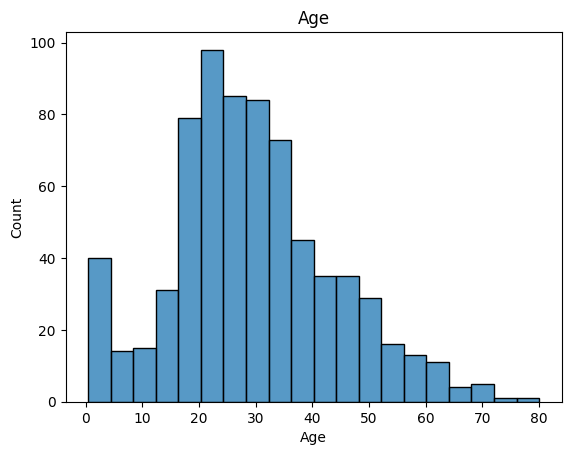

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


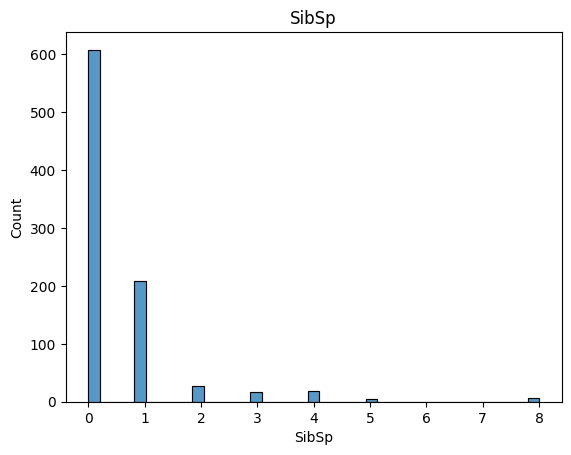

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


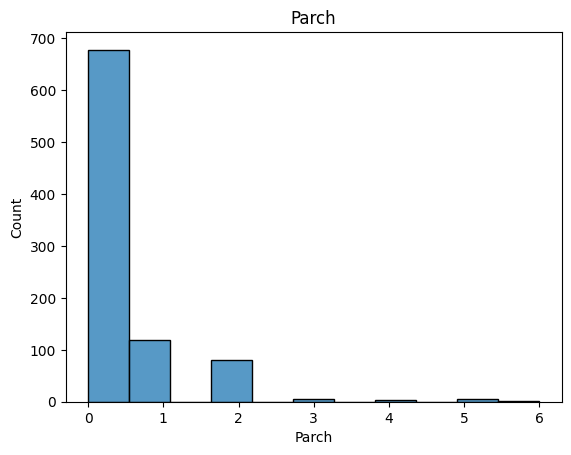

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


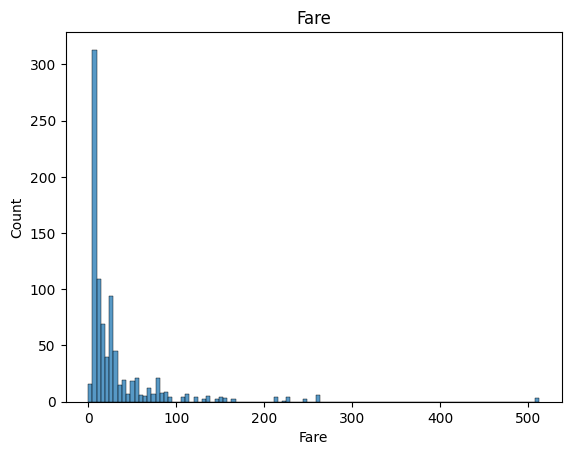

In [10]:
for column in numeric_df:
    sns.histplot(x = column, data = train_data)
    plt.title(f'{column}')
    plt.show()

* Age follows a normal distribution
* Consider normalizing Fare price since there is a high frequency at a low price

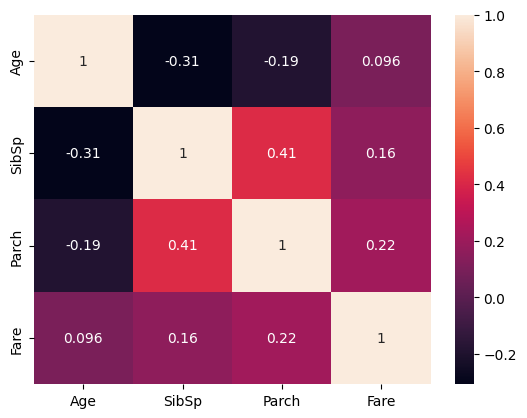

In [11]:
#Visualize correlations using heatmaps
numeric_df = train_data[['Age', 'SibSp', 'Parch', 'Fare']]
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [12]:
#Let's compare the rate of survival across Age, SibSp, Parch, Fare
train_data.groupby('Survived')[['Age', 'SibSp', 'Parch', 'Fare']].mean()


,Age,SibSp,Parch,Fare
Survived,,,,
0,30.626179,0.553734,0.329690,22.117887
1,28.343690,0.473684,0.464912,48.395408


Possibilities:

* Younger people could have had higher chances of survival
* Maybe if you're a child and you have parents onboard, they could prioritize you for survival
* People that paid more could mean higher chances of survival

**Categorical Visualization**

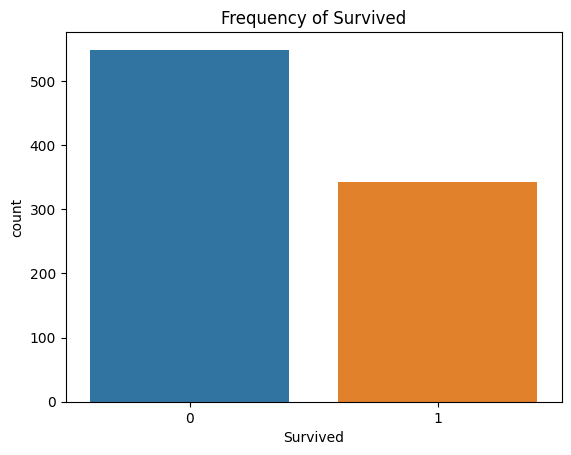

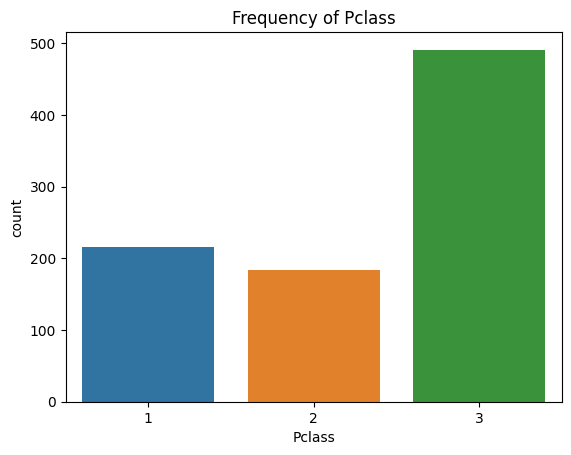

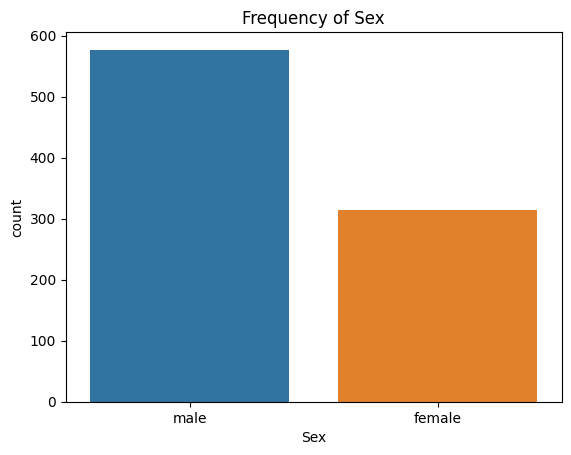

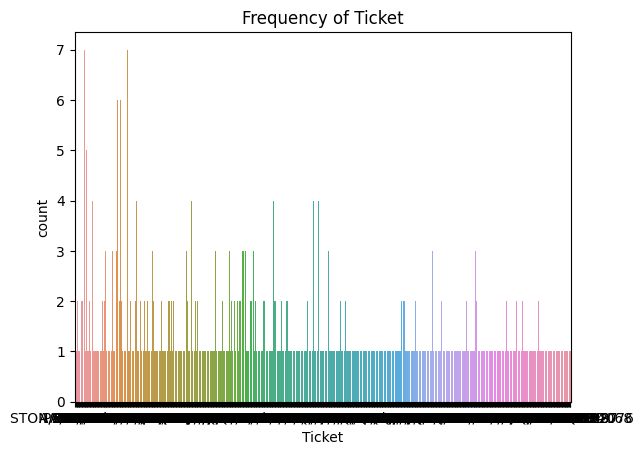

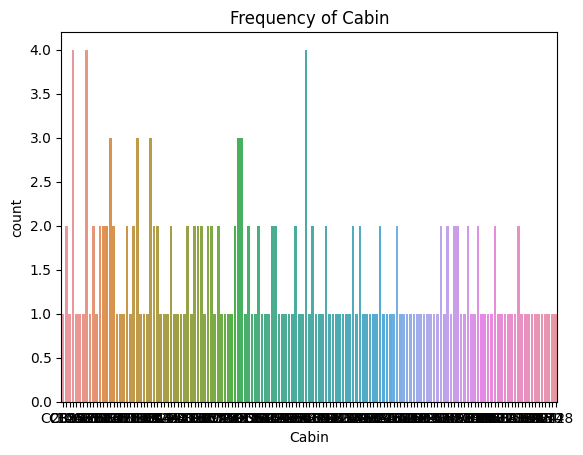

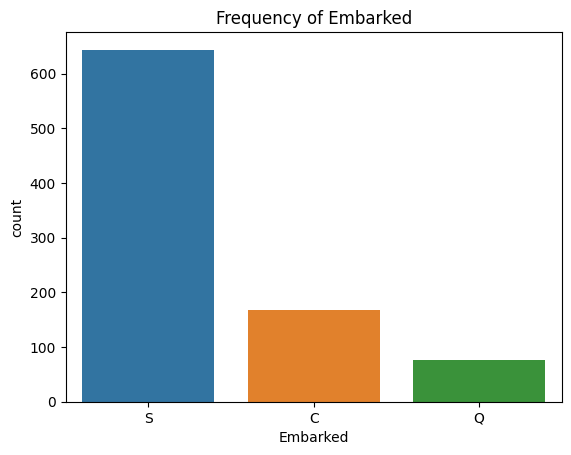

In [13]:
for column in categ_df:
    sns.countplot(x=column, data=train_data)
    plt.title(f'Frequency of {column}')
    plt.show()


Observations:

* Majority of the passengers did not survive
* Since the '3' Passenger ticket is what most passengers had, it is most likely the general ticket
* Majority of passengers embarked from Southhampton

**What are some questions we can ask ourself to better predict survivability?**

* Did the class of the ticket (Pclass: 1st, 2nd, 3rd) influence the likelihood of survival?
* Did the fare paid for the ticket correlate with survival?
* Did traveling with family (siblings, spouses, parents, or children) increase the chances of survival?
* Were younger passengers more likely to survive compared to older ones?
* Did people's honorifics, or titles associated with their name heighten survival? --> Did royalty guarantee survival


Below, we will compare the survival rates compared to the different categorical features as well as get into specifics such as the relationship between having multiple cabins and survival, and maybe the specific ticket value had to do with survival rate

In [14]:
#Let's make a table comparing the different categorical variables and their survival rates
# For 'Pclass' and 'Survived'
pivot_pclass = train_data.groupby(['Survived', 'Pclass']).size().unstack(fill_value=0)

# For 'Sex' and 'Survived'
pivot_sex = train_data.groupby(['Survived', 'Sex']).size().unstack(fill_value=0)

# For 'Embarked' and 'Survived'
pivot_embarked = train_data.groupby(['Survived', 'Embarked']).size().unstack(fill_value=0)

# Display all the pivot tables
print(pivot_pclass)

print(pivot_sex)

print(pivot_embarked)


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


* The majority of people that survived in terms of passenger class is in first class (136)
      - In terms of building the model, this could provide significance for solving problem
* The majority of people that survived in terms of sex were females
      - The practices they used has a high likelihood of prioritizing women and children
* The majority of people that survived embarked in Southampton

**Feature Engineering**
* Multiple bins for 'Cabin' and 'Ticket' that needs to be simplified

In [15]:
#create a new feature called cabin_multiple in the training_data DataFrame, which indicates whether a passenger has multiple cabins listed.
# We can do this by assiging people who had one cabin = null = 0, then if not, the number of spaces = number of extra cabins
train_data['cabin_multiple'] = train_data.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
train_data['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [16]:
#Let's also check from take a look at the relationship between the people who survived and the amount of cabins they owned
#pd.pivot_table(train_data, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count')
train_data.groupby('Survived')[['cabin_multiple']].value_counts().unstack(fill_value=0)

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481,58,7,3,0
1,206,122,9,3,2


In [17]:
#We can further explore the cabins by taking a look at the cabin letter and see if that had an effect on survival rate
#Let's assume that cabin letter at the same location of the titanic
#Extracting the letter from each value
train_data['cabin_letter'] = train_data.Cabin.apply(lambda x: str(x)[0])

In [18]:
#Print out a pivot table comparing survival rate and their cabin letter
#Where 'n' is na - people that did not have a cabin assigned in the data.
train_data.groupby('Survived')[['cabin_letter']].value_counts().unstack(fill_value=0)

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


* Majority of the people that had no assigned cabin in the data did not survive
* In terms of non-null values (A - T), we can see that there are more people who survived

**Now we can take a look at the 'ticket' values**

In [19]:
#It's worth trying to play around with the ticket values to see if this affected survival rate
#One way to do this is comparing the different tickets and comparing the ones with numbers and ones with letters + numbers

# Let's split it up into numeric = 1 when there is only numbers in the ticker and = 0 when numbers with letters involved
train_data['numbers_ticket'] = train_data.Ticket.apply(lambda x : 1 if x.isnumeric() else 0)
#Let's extract the ticket letters: split data into a list of substrings, then remove the last element(the number), remove the '.s', remove the /s, this only happens if length of list is > 0
train_data['letters_ticket'] = train_data.Ticket.apply(lambda x : ' '.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len (x.split(' ')[:-1]) > 0 else 0)

In [20]:
train_data['numbers_ticket'].value_counts()
#There are 661 tickets with only numbers
#There are 230 tickets with strings involved (letters)

numbers_ticket
1    661
0    230
Name: count, dtype: int64

In [21]:
#Let's print out tickets only containing numbers and their relationship with survival rate
train_data.groupby('Survived')[['numbers_ticket']].value_counts().unstack(fill_value=0)
#We can see that the ratios of people who survived and didnt with people who had numbers contained in their ticket or not is similar so probably not going to be considered for model

numbers_ticket,0,1
Survived,,
0,142,407
1,88,254


In [22]:
#Let's print out tickets that contains letters and their relationship with survival rate
train_data.groupby('Survived')[['letters_ticket']].value_counts().unstack(fill_value=0)
#Very difficult to see anything relevant to survival in terms of different ticket
#Could take a look at it again later

letters_ticket,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,sop,sopp,sotono2,sotonoq,sp,stono 2,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410,7,19,1,3,27,1,1,1,1,...,1,3,2,13,1,7,3,0,9,2
1,255,0,2,0,2,14,0,0,0,4,...,0,0,0,2,0,5,3,2,1,1


**We could further look into people's titles associated with their name and compare their survivability**
* Mr.
* Mrs.
* Major
* Captain
* etc.

In [23]:
#We can extract their titles by realizing that there is a comma before their title in their values
train_data['title_name'] = train_data.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())

train_data['title_name'].value_counts()

title_name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

**Attempt at understanding and building a model for prediction of survival:**
* Features to include in model including the pivot table features we created: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_letter', 'cabin_multiple', 'numbers_ticket','title_name'. We will decide to exclude name and passengerId since the features above are more significant to look at

* How we will handle missing/null data:
   1. Drop for Embarked since we only have 2 null
   2. Impute mean missing values for fare and age. We will fill in the NA values with the mean of the training data

* Categorical transform on all data (copy what we did for training data) - This ensures our train and test data will have the same columns and allows for our model to use it.

* Normalize fare to get value for model to better see the patterns

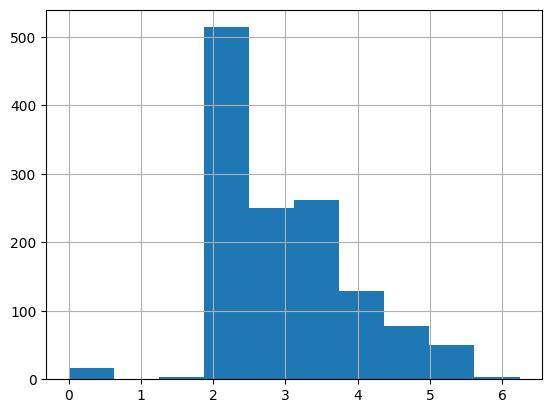

In [24]:
#Declare and assign new categorical variables for both train and test for model
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_letter'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numbers_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['letters_ticket'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['title_name'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
                                               
#Drop null values for the embarked column
all_data.dropna(subset=['Embarked'], inplace=True)

#Impute fare and age with mean
all_data.Age = all_data.Age.fillna(all_data.Age.mean())
all_data.Fare = all_data.Fare.fillna(all_data.Fare.mean())

#normalize fare to get ~a normal distribution, used in data processing to compress a skewed distribution. 
#Since Fare values tend to be heavily skewed (with a small number of high-value fares), 
#applying a log transformation reduces the impact of extreme values and helps in making the data more normally distributed.
all_data['normal_fare'] = np.log(all_data.Fare+1) #Add 1 since values with 0 fare causes an error 
all_data['normal_fare'].hist()

all_data.Pclass = all_data.Pclass.astype(str)

#We will use getdummies() in pandas since models typically require numeric inputs.
#One-hot encoding is a process that converts categorical values into binary columns: 0,1 
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'normal_fare', 
                                       'Embarked', 'cabin_multiple', 'numbers_ticket', 'title_name', 'train_test']])

#Finally, we will split data into our train and test variables for X and y
#we will use the train_test column where 1 represents training data and 0 represents it isnt (test data)
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)

#Our target variable. Access the survived column for all the training data only since this is our target variable for model
y_train = all_data[all_data.train_test == 1].Survived

Notice that fare is not a bit more normally distributed so easier for model to use

**We will experiment with the different models and use trial and error / experimenting to observe how they perform**
* Use cross validation - gets samples from training data and predicts on the data given
* 

In [25]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','normal_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','normal_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [27]:
#It's good to have a baseline for classification and reference to compare how good the other models do. Using Naive Bayes model as base
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.50561798 0.42696629 0.4494382  0.47752809 0.47457627]
0.4668253665968387


In [28]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.83146067 0.80337079 0.81460674 0.8700565 ]
0.8290674792103092


In [29]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.83707865 0.85955056 0.79213483 0.82485876]
0.8233987177045643


In [30]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.80337079 0.80337079 0.8258427  0.83050847]
0.8065511331175014


In [31]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.80337079 0.84269663 0.79213483 0.86440678]
0.8313083222243384


In [32]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.85875706]
0.8313019742271314


In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.80337079 0.85393258 0.78651685 0.81355932]
0.8121500666539706


In [34]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
#Here we use soft so we will get a probabiltiy (confidence) from each model if a person survived or not

In [35]:
#Cross validation score for voting classifier
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.81460674 0.85393258 0.81460674 0.86440678]
0.840297086269282


In [36]:
print(all_data.isna().sum()) 

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             0
train_test           0
cabin_multiple       0
cabin_letter         0
numbers_ticket       0
letters_ticket       0
title_name           0
normal_fare          0
dtype: int64


In [37]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

**Cross-validation is a technique used to evaluate how well a model generalizes to unseen data: Here are the results from all the classifiers:**

* Naive Bayes (47.1%)
* Logistic Regression (82.8%)
* Decision Tree (82.6%)
* K Nearest Neighbor (76.9%)
* Random Forest (82.5%)
* Support Vector Classifier (83.2%)
* Xtreme Gradient Boosting (81.7%)
* Soft Voting Classifier - All Models (83.57%)

**Model Tuning**
Let's see how much we can improve our models

In [38]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [39]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [40]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8515393893226687
Best Parameters: {'C': 78.47599703514607, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [41]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8279121437186567
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [42]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8492985463086397
Best Parameters: {'C': 1, 'kernel': 'linear'}
